In [3]:
!pip install quandl

You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [4]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import quandl

In [28]:
quandl.ApiConfig.api_key = '3uFZmn65nt3yBE1MrM-z'

#importando data set
df_oil = quandl.get("FRED/DCOILBRENTEU", start_date="1987-05-20", 
                  end_date="2060-01-01")
df_oil.head()

,Value
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


In [29]:
df_oil.tail()

,Value
Date,
2021-08-03,73.24
2021-08-04,70.99
2021-08-05,72.14
2021-08-06,71.02
2021-08-09,69.65


<AxesSubplot:xlabel='Date', ylabel='Crude Oil Prices: Brent - Europe'>

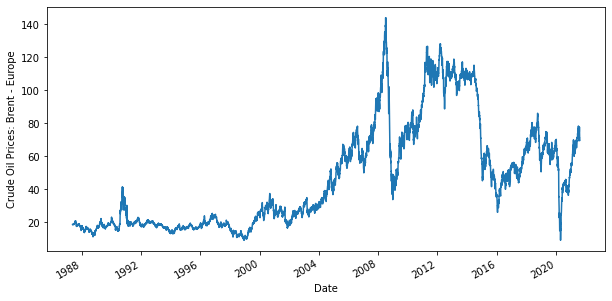

In [30]:

plt.ylabel("Crude Oil Prices: Brent - Europe")

df_oil.Value.plot(figsize=(10,5))

In [31]:
df_oil['MA3'] = df_oil['Value'].shift(1).rolling(window=1).mean()
df_oil['MA9']= df_oil['Value'].shift(1).rolling(window=2).mean()


In [32]:

df_oil = df_oil.dropna()

X = df_oil[['MA3','MA9']]
X.head()

,MA3,MA9
Date,,
1987-05-22,18.45,18.540
1987-05-25,18.55,18.500
1987-05-26,18.60,18.575
1987-05-27,18.63,18.615
1987-05-28,18.60,18.615


In [33]:
#Variable dependiente
y = df_oil['Value']
y.head()

Date
1987-05-22    18.55
1987-05-25    18.60
1987-05-26    18.63
1987-05-27    18.60
1987-05-28    18.60
Name: Value, dtype: float64

In [34]:

training = 0.8
t = int(training*len(data))


X_train = X[:t]
y_train = y[:t]


X_test = X[t:]
y_test = y[t:]

In [35]:
#Regresion Linear
model = LinearRegression().fit(X_train,y_train)

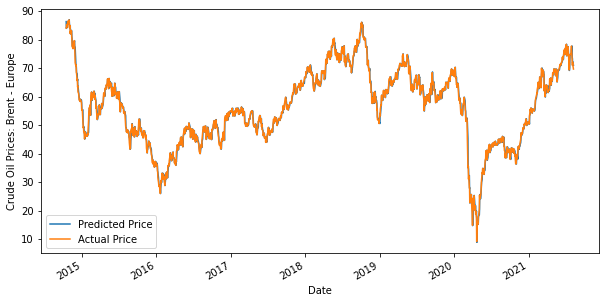

In [36]:

predicted_price = model.predict(X_test)
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])
predicted_price.plot(figsize=(10,5))
y_test.plot()
plt.legend(['Predicted Price','Actual Price'])
plt.ylabel("Crude Oil Prices: Brent - Europe")
plt.show()

